## Descrição da base de dados

O dataset, intitulado "Data Science Job Salaries," contém informações sobre os salários de diferentes cargos na área de ciência de dados. Ele oferece uma visão abrangente de como as remunerações variam com base em diferentes fatores, como o nível de experiência, tipo de emprego, localização do empregado e da empresa, e a quantidade de trabalho remoto.

Sobre o Dataset

| Column |  Description | 
|----------|----------|
| work_year | The year the salary was paid. | 
| experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance | 
| job_title | The role worked in during the year. | 
| salary | The total gross salary amount paid. | 
| salary_currency | The currency of the salary paid as an ISO 4217 currency code. | 
| salary_in_usd | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). | 
| employee_residence | The year the salary was paid. | 
| remote_ratio |  The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) | 
| company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code. | 
| company_size |The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) | 

___

## Perguntas para a análise exploratória:

**Salários**

*Distribuição salarial:*
- Qual a distribuição salarial média por nível de experiência?
- Como os salários variam por tipo de emprego (full-time, part-time, etc.)?
- Qual a relação entre salário e tamanho da empresa?
- Existe uma diferença significativa nos salários entre diferentes locais de trabalho?

*Desvios salariais:*
- Qual a amplitude salarial para cada cargo?
- Existem outliers salariais? Se sim, o que eles podem indicar?

*Impacto da moeda:*
- Como a conversão para dólares afeta a comparação de salários entre diferentes países?
- Existe uma correlação entre o salário em moeda local e o salário em dólares?

**Cargos e Experiência**

*Cargos mais comuns:*
- Quais são os cargos mais comuns no dataset?
- Como a demanda por diferentes cargos varia ao longo dos anos?

*Progressão de carreira:*
- Qual a relação entre o nível de experiência e o cargo?
- Existe uma progressão de carreira típica nesse dataset?

*Habilidades em alta:*
- Analisando os títulos dos cargos, quais habilidades são mais demandadas?

**Localização e Tamanho da empresa**

*Mercado de trabalho por região:*
- Quais regiões oferecem os salários mais altos?

*Tamanho x Salário*
- As grandes empresas pagam salários mais altos?
- Qual o tipo de cargo mais comum em empresas de cada tamanho?

___

Itens a verificar:

01. Dados vazios - OK
02. Retirar as colunas redundantes: salary e salary_currency - Apresentar a base original e na sequencia fazer a exclusão delas explicando o motivo dessa decisão.
03. Incluir 2 colunas: salário em real (anual) e salario em real (valor mensal). Valor da média da moeda USD no ano de referência.
04. Contagem de work_year
05. Contagem employeee_residence
06. Contagem company_location
07. Contagem company_size
08. Média salarial por employee_residence
09. Media salarial company_location
10. Contagem job_title - OK
11. Contagem experience_level - OK
12. Fazer uma analise de outliers para verificar quais cargos possuem maior e menor salários, porque alguns podem estar enquadrados nos outliers.

___

## Pré-Processamento dos dados

Instalação das bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importação do Dataset

In [48]:
df = pd.read_csv("./ds_salaries.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [49]:
df.shape

(607, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**Exclusão de colunas do Dataset**

Com o objetivo de reduzir a dimensionalidade do dataset e otimizar o tempo de processamento, as colunas 'Unnamed: 0', 'salary' e 'salary_currency' foram descartadas. A coluna 'Unnamed: 0' é um índice gerado automaticamente e não agrega valor à análise. As colunas 'salary' e 'salary_currency' foram removidas por possuirem informações redundantes e, portanto, desnecessárias para este estudo. Embora essa decisão tenha sido tomada para simplificar o exemplo, em datasets de grande porte, a exclusão de colunas irrelevantes é crucial para otimizar o processamento e a memória, evitando gargalos e aumentando a eficiência das análises.

In [51]:
df = df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis = 1)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [52]:
df.shape

(607, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


**Inclusão de novas colunas**

A fim de adaptar os dados à realidade brasileira, foram criadas as colunas 'salário_anual_brl' e 'salário_mensal_brl'. Os valores em dólares foram convertidos para reais utilizando as taxas de câmbio médias de cada ano. Essa conversão foi realizada em duas etapas: primeiro, o salário anual em dólares foi convertido para salário anual em reais e, em seguida, esse valor foi dividido por 12 para obter o salário mensal em reais. As análises subsequentes serão baseadas nesses valores convertidos.

In [54]:
exchange_rates = {2020: 5.16,
                  2021: 5.39,
                  2022: 5.17}
df['anual_salary_brl'] = df.apply(lambda row: row['salary_in_usd'] * exchange_rates[row['work_year']], axis=1)
df['monthly_salary_brl'] = df.apply(lambda row: row['anual_salary_brl'] / 12, axis=1).round(2)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,411938.28,34328.19
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,1341600.00,111800.00
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,562563.84,46880.32
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,103200.00,8600.00
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,774000.00,64500.00
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,796180.00,66348.33
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,651420.00,54285.00
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,666930.00,55577.50
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,775500.00,64625.00


In [60]:
df.shape

(607, 12)

In [73]:
# Criando o dicionário de mapeamento
categories = {
    '3D Computer Vision Researcher': 'Other',
    'AI Scientist': 'Scientist',
    'Analytics Engineer': 'Engineer',
    'Applied Data Scientist': 'Scientist',
    'Applied Machine Learning Scientist': 'Scientist',
    'BI Data Analyst': 'Data Analyst',
    'Big Data Architect': 'Architect',
    'Big Data Engineer': 'Engineer',
    'Business Data Analyst': 'Data Analyst',
    'Cloud Data Engineer': 'Engineer',
    'Computer Vision Engineer': 'Engineer',
    'Computer Vision Software Engineer': 'Engineer',
    'Data Analyst': 'Data Analyst',
    'Data Analytics Engineer': 'Engineer',
    'Data Analytics Lead': 'Leadership',
    'Data Analytics Manager': 'Leadership',
    'Data Architect': 'Architect',
    'Data Engineer': 'Engineer',
    'Data Engineering Manager': 'Leadership',
    'Data Science Consultant': 'Consultant',
    'Data Science Engineer': 'Engineer',
    'Data Science Manager': 'Leadership',
    'Data Scientist': 'Scientist',
    'Data Specialist': 'Other',
    'Director of Data Engineering': 'Engineer',
    'Director of Data Science': 'Leadership',
    'ETL Developer': 'Developer',
    'Finance Data Analyst': 'Data Analyst',
    'Financial Data Analyst': 'Data Analyst',
    'Head of Data': 'Leadership',
    'Head of Data Science': 'Leadership',
    'Head of Machine Learning': 'Leadership',
    'Lead Data Analyst': 'Leadership',
    'Lead Data Engineer': 'Leadership',
    'Lead Data Scientist': 'Leadership',
    'Lead Machine Learning Engineer': 'Leadership',
    'Machine Learning Developer': 'Developer',
    'Machine Learning Engineer': 'Engineer',
    'Machine Learning Infrastructure Engineer': 'Engineer',
    'Machine Learning Manager': 'Leadership',
    'Machine Learning Scientist': 'Scientist',
    'Marketing Data Analyst': 'Data Analyst',
    'ML Engineer': 'Engineer',
    'NLP Engineer': 'Engineer',
    'Principal Data Analyst': 'Data Analyst',
    'Principal Data Engineer': 'Engineer',
    'Principal Data Scientist': 'Scientist',
    'Product Data Analyst': 'Data Analyst',
    'Research Scientist': 'Scientist',
    'Staff Data Scientist': 'Scientist'
}

# Adicionando a nova coluna 'categoria' ao DataFrame
df['categories'] = df['job_title'].map(categories).fillna('Outros')

# Agora, o DataFrame 'df' terá uma nova coluna 'categoria' com as subcategorias correspondentes
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl,categories
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,411938.28,34328.19,Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,1341600.00,111800.00,Scientist
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,562563.84,46880.32,Engineer
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,103200.00,8600.00,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,774000.00,64500.00,Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,796180.00,66348.33,Engineer
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,651420.00,54285.00,Engineer
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,666930.00,55577.50,Data Analyst
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,775500.00,64625.00,Data Analyst


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_in_usd       607 non-null    int64  
 5   employee_residence  607 non-null    object 
 6   remote_ratio        607 non-null    int64  
 7   company_location    607 non-null    object 
 8   company_size        607 non-null    object 
 9   anual_salary_brl    607 non-null    float64
 10  monthly_salary_brl  607 non-null    float64
 11  categories          607 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 57.0+ KB


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.00,2021.000,2022.00,2022.00,2022.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.00,62726.000,101570.00,150000.00,600000.0
remote_ratio,607.0,70.922570,40.709130,0.00,50.000,100.00,100.00,100.0
anual_salary_brl,607.0,588319.747759,372753.046448,15410.01,333899.720,539000.00,782634.60,3234000.0
monthly_salary_brl,607.0,49026.645552,31062.753895,1284.17,27824.975,44916.67,65219.55,269500.0


### EDA

### Analise dos trabalhos

Quais são os cargos com mais profissionais na área de dados?

In [38]:
df['job_title'].value_counts()


job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineering Manager      

Quantos cargos diferentes temos na base toda?

In [39]:
df['job_title'].nunique()

50

*Aqui estão o Top 10 cargos com mais profissionais respondentes da pesquisa.*

In [40]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
jobs.head(10)

,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
15,Data Analytics Manager,7


In [77]:
df['categories'].value_counts()

categories
Engineer        218
Scientist       191
Data Analyst    116
Leadership       56
Architect        12
Consultant        7
Developer         5
Other             2
Name: count, dtype: int64

rEscrever algo aqui

In [43]:
df['company_location'].value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
PT      4
PL      4
AT      4
MX      3
DK      3
AE      3
PK      3
LU      3
TR      3
BR      3
AU      3
RU      2
CN      2
CH      2
BE      2
NG      2
SI      2
IT      2
CZ      2
NZ      1
HU      1
HN      1
SG      1
HR      1
MT      1
IL      1
UA      1
RO      1
IQ      1
MD      1
CL      1
IR      1
VN      1
KE      1
CO      1
AS      1
DZ      1
EE      1
MY      1
IE      1
Name: count, dtype: int64

In [45]:
df['company_location'].nunique()

50

In [44]:
df['company_size'].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [22]:
df['experience_level'].value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [23]:
df['work_year'].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

In [24]:
df['employment_type'].value_counts()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

C:\Users\priga\AppData\Local\Temp\ipykernel_7164\2827442750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_title',y=0,data = jobs[:10],palette = 'deep')


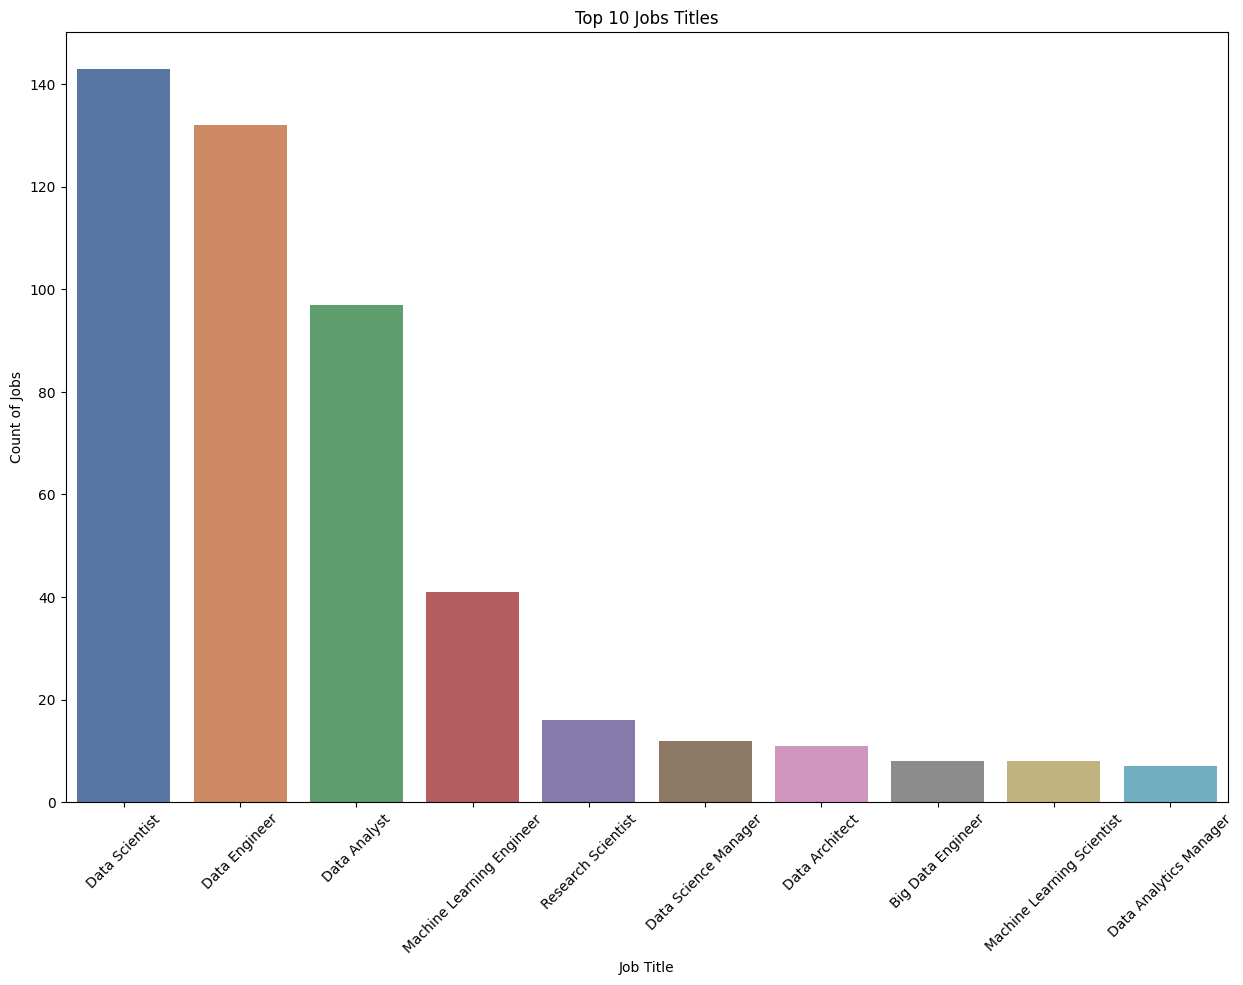

In [63]:
plt.figure(figsize=(15, 10))
sns.barplot(x='job_title',y=0,data = jobs[:10],palette = 'deep')
plt.title('Top 10 Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Count of Jobs')
plt.xticks(rotation=45)
plt.show()

OBSERVAÇÕES:

Foi possivel perceber que do top 10 vagas que mais tem profissionais neste dataset os que mais se destacam é os Data Scientist, Data Engineer e Data Analyst.

### Qual o grau de Senioridade dos profissionais de dados?

In [71]:
levels = df.experience_level.value_counts()
levels

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

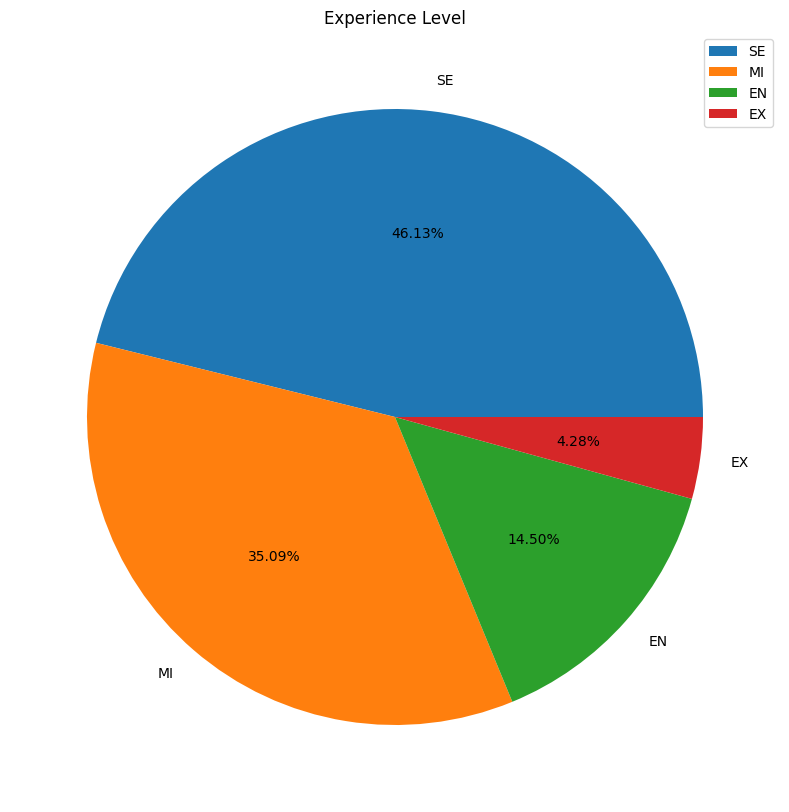

In [72]:
plt.figure(figsize=(15, 10))
plt.pie(x=levels.values, labels=levels.index, autopct='%1.2f%%')
plt.title('Experience Level')
plt.legend()
plt.show()

Observação:

Com a análise desse gráfico se nota uma maior participação de profissionais seniores 